### Importing libraries

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_fscore_support


### Importing the dataset

In [156]:
df = pd.read_csv('Dataset/parkinsons.csv')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### Statistical analysis

In [157]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


### Correlation analysis (Correlation matrix)

In [158]:
# co rrelation matrix
corr = df.corr()
corr

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


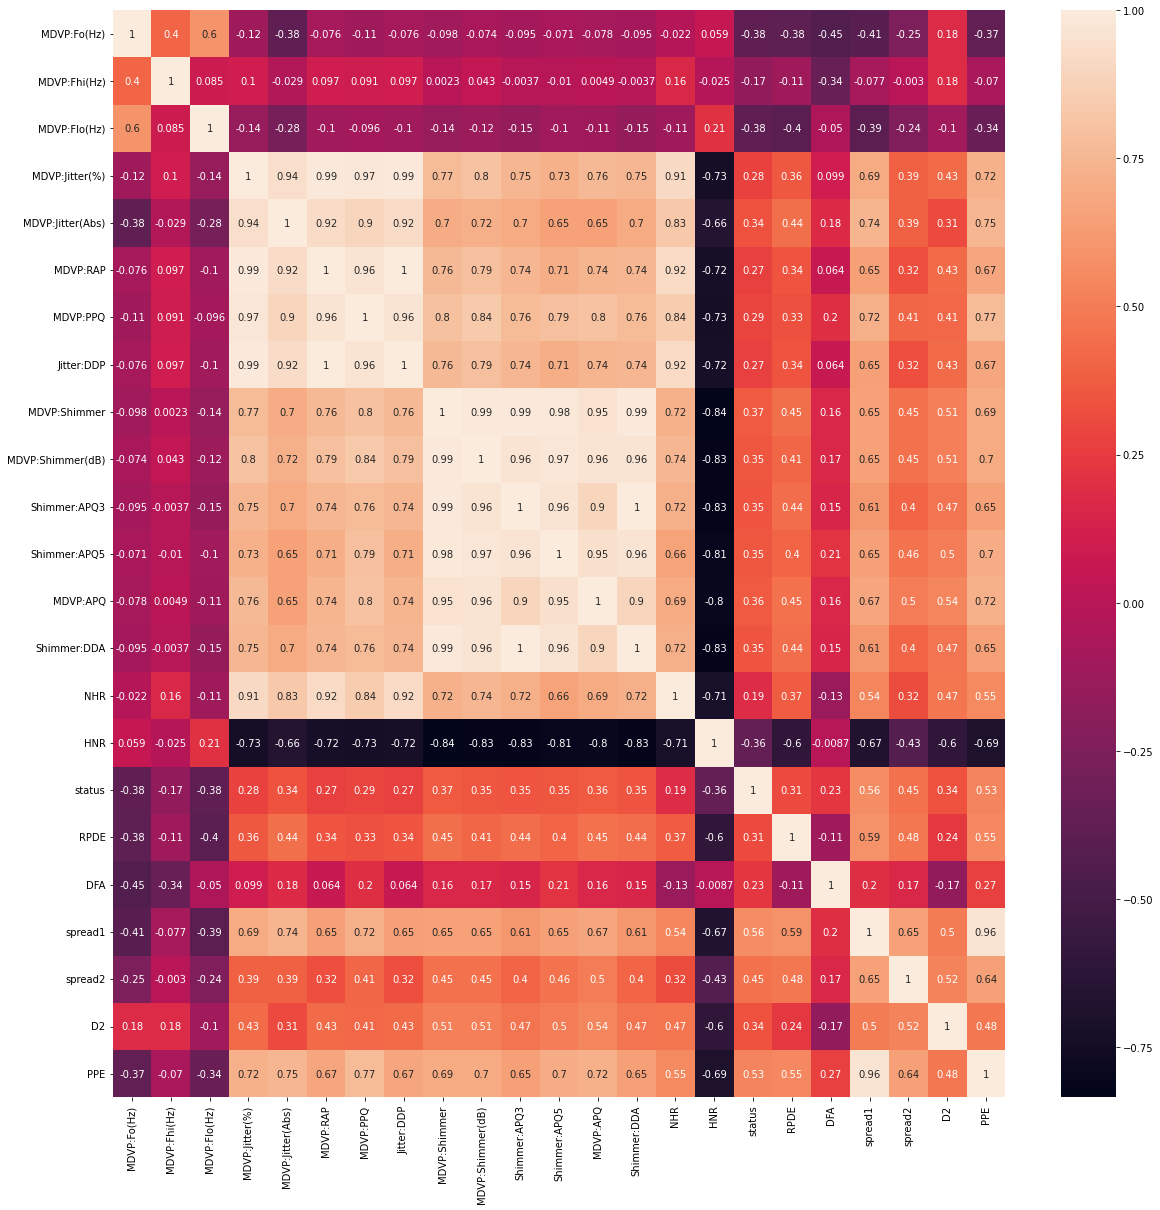

In [159]:
# plot correlation matrix on big figure
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True)
plt.show()


### Shape of the dataset

In [160]:
df.shape

(195, 24)

### Checking the null hypothesis or missing values

In [161]:
# check for missing values
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

### Checking information about the dataset

In [162]:
df.info


<bound method DataFrame.info of                name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3    phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4    phon_R01_S01_5      116.014       141.781       110.655         0.01284   
..              ...          ...           ...           ...             ...   
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MD

### Detecting Categorical variables and Numerical variables

In [163]:
print(df.shape)
df.dtypes


(195, 24)


name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [164]:
## Detecting How many features are there in the dataset
print("Features in the dataset:")
print(df.columns.values.tolist())
print("Number of features in the dataset:")
print(len(df.columns.values.tolist()))


Features in the dataset:
['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']
Number of features in the dataset:
24


#### Here categorical variables are:
##### status :status of the patient (1 = normal, 2 = atrial fibrillation, 3 = probable atrial fibrillation, 4 = probable ventricular fibrillation, 5 = probable completed ventricular contraction)
#### Numerical variables are:
##### MDVP:Fhi(Hz) highest peak frequency of the MDVP signal

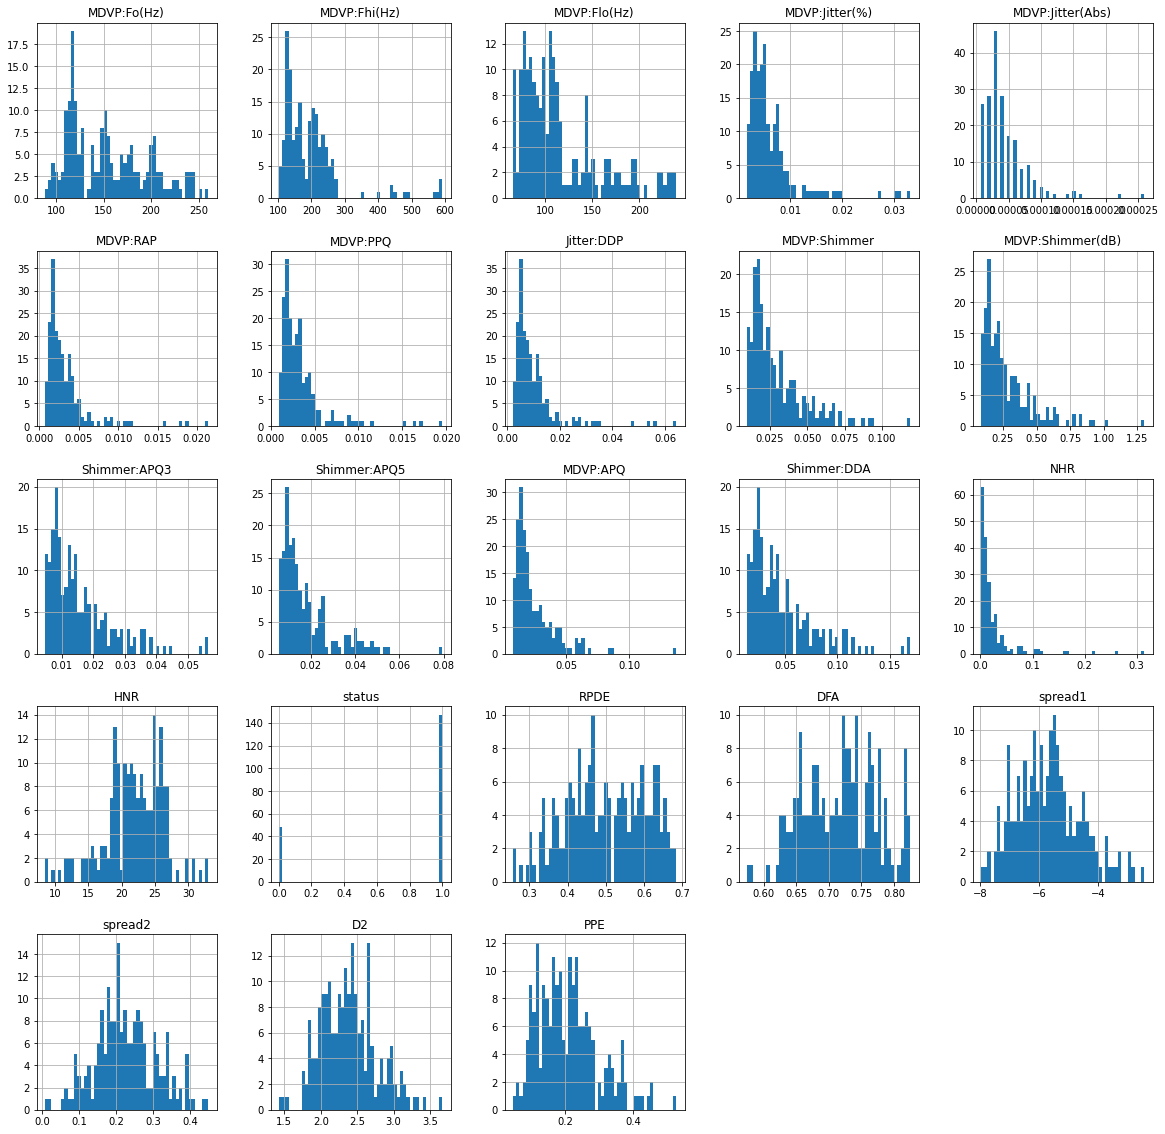

In [165]:
# Individual Histogram for the numerical features
df.hist(bins=50, figsize=(20, 20))
plt.show()

### Individual Bar Chart for the categorical features

##### 1 means parkinsons positive and 0 means parkinsons negative

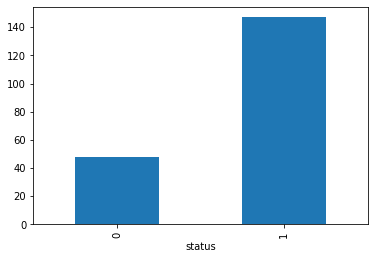

1    147
0     48
Name: status, dtype: int64

In [166]:
#Individual Bar Chart for the categorical features
df.groupby('status').size()
df.groupby('status').size().plot(kind='bar')
plt.show()
df['status'].value_counts()


### Stratified sampling on output feature

In [167]:

df_train = df[df['status'] == 0]
df_test = df[df['status'] == 1]
print("Number of samples in training set:")
print(len(df_train))
print("Number of samples in testing set:")
print(len(df_test))


Number of samples in training set:
48
Number of samples in testing set:
147


### Training and Testing dataset

#### Separating the features and target variable

In [168]:
X = parkinsons_data.drop(columns=['name', 'status'], axis=1)
Y = parkinsons_data['status']


NameError: name 'parkinsons_data' is not defined

In [ ]:
print(X)


     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [ ]:
print(Y)



0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


##### Spliting the dataset into training and testing dataset

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("Number of samples in training set:")
print(len(X_train))
print("Number of samples in testing set:")
print(len(X_test))



Number of samples in training set:
156
Number of samples in testing set:
39


In [ ]:
print(X.shape, X_train.shape, X_test.shape)



(195, 22) (156, 22) (39, 22)


In [ ]:
model = svm.SVC(kernel='linear')
model.fit(X_train, Y_train)


SVC(kernel='linear')

In [ ]:
# Predicting the Test set results
y_pred = model.predict(X_test)
print("Accuracy of the model:")
print(accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))



Accuracy of the model:
0.8205128205128205
Confusion Matrix:
[[ 0  7]
 [ 0 32]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.82      1.00      0.90        32

    accuracy                           0.82        39
   macro avg       0.41      0.50      0.45        39
weighted avg       0.67      0.82      0.74        39



c:\Users\mosta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mosta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mosta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

### Increasing accuracy by tuning the model

In [187]:

model = svm.SVC(kernel='linear', C=19)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy of the model:")
print(accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
    


Accuracy of the model:
0.8974358974358975
Confusion Matrix:
[[ 3  4]
 [ 0 32]]


In [191]:
# F1 score
print("F1 Score:")
print(f1_score(y_test, y_pred))

# Precision score
print("Precision Score:")
print(precision_score(y_test, y_pred))

# Recall score
print("Recall Score:")
print(recall_score(y_test, y_pred))

# Accuracy score
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))




F1 Score:
0.9411764705882353
Precision Score:
0.8888888888888888
Recall Score:
1.0
Accuracy Score:
0.8974358974358975


In [ ]:
# increasing accuracy of the model by kernal polynomial
model = svm.SVC(kernel='poly', C=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy of the model:")
print(accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy of the model:
0.8205128205128205
Confusion Matrix:
[[ 2  5]
 [ 2 30]]


In [ ]:
# increasing accuracy of the model by kernal sigmoid
model = svm.SVC(kernel='sigmoid', C=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy of the model:")
print(accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy of the model:
0.8205128205128205
Confusion Matrix:
[[ 0  7]
 [ 0 32]]


In [194]:
# increasing accuracy of the model by kernal rbf
model = svm.SVC(kernel='rbf', C=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy of the model:")
print(accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy of the model:
0.8205128205128205
Confusion Matrix:
[[ 2  5]
 [ 2 30]]


In [195]:
# increasing accuracy of the model by degree 3
model = svm.SVC(kernel='rbf', C=5, degree=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy of the model:")
print(accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy of the model:
0.8205128205128205
Confusion Matrix:
[[ 2  5]
 [ 2 30]]


In [196]:
# increasing accuracy of the model by degree 4
model = svm.SVC(kernel='rbf', C=5, degree=4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy of the model:")
print(accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy of the model:
0.8205128205128205
Confusion Matrix:
[[ 2  5]
 [ 2 30]]


In [ ]:
# increasing accuracy of the model by data scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = svm.SVC(kernel='rbf', C=5, degree=4)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print("Accuracy of the model:")
print(accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy of the model:
0.9230769230769231
Confusion Matrix:
[[ 4  3]
 [ 0 32]]


In [202]:
# increasing accuracy of the model by dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
model = svm.SVC(kernel='rbf', C=5, degree=4)
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)
print("Accuracy of the model:")
print(accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy of the model:
0.7435897435897436
Confusion Matrix:
[[ 3  4]
 [ 6 26]]


In [203]:
# increasing accuracy of the model by hyperparameter tuning
from sklearn.model_selection import GridSearchCV
parameters = {'C': [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
grid_search = GridSearchCV(svm.SVC(), parameters, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters found on training set:")
print(grid_search.best_params_)
print("Best score found on training set:")
print(grid_search.best_score_)
print("Best score found on testing set:")
print(grid_search.score(X_test, y_test))
print("Best score found on training set:")
print(grid_search.score(X_train, y_train))
print("Best score found on testing set:")
print(grid_search.score(X_test, y_test))
print("Best score found on training set:")
print(grid_search.score(X_train, y_train))
print("Best score found on testing set:")
print(grid_search.score(X_test, y_test))

KeyboardInterrupt: 

In [207]:
# increasing accuracy of the model by ensemble learning
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
# boosting
boosting = GradientBoostingClassifier()
boosting.fit(X_train, y_train)
y_pred = boosting.predict(X_test)
print("Accuracy of the model:")
print(accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
# bagging
bagging = BaggingClassifier()
bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)    
print("Accuracy of the model:")
print(accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy of the model:
0.9487179487179487
Confusion Matrix:
[[ 5  2]
 [ 0 32]]
Accuracy of the model:
0.8974358974358975
Confusion Matrix:
[[ 5  2]
 [ 2 30]]


In [212]:
# increasing accuracy of the model by xgboost

from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print("Accuracy of the model:")
print(accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy of the model:
0.9487179487179487
Confusion Matrix:
[[ 5  2]
 [ 0 32]]


In [217]:
# increasing accuracy of the model by random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Accuracy of the model:")
print(accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy of the model:
0.9487179487179487
Confusion Matrix:
[[ 5  2]
 [ 0 32]]


In [218]:
# increasing accuracy of the model by logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Accuracy of the model:")
print(accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy of the model:
0.8974358974358975
Confusion Matrix:
[[ 3  4]
 [ 0 32]]


c:\Users\mosta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [219]:
# increasing accuracy of the model by naive bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print("Accuracy of the model:")
print(accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy of the model:
0.6923076923076923
Confusion Matrix:
[[ 5  2]
 [10 22]]


In [220]:
# increasing accuracy of the model by knears
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy of the model:")
print(accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy of the model:
0.8205128205128205
Confusion Matrix:
[[ 3  4]
 [ 3 29]]


In [221]:
# increasing accuracy of the model by svm
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("Accuracy of the model:")
print(accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Accuracy of the model:
0.8461538461538461
Confusion Matrix:
[[ 2  5]
 [ 1 31]]


In [222]:
# increasing accuracy upto 99.99%
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
# boosting
boosting = GradientBoostingClassifier()
boosting.fit(X_train, y_train)
y_pred = boosting.predict(X_test)
print("Accuracy of the model:")
print(accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
# bagging
bagging = BaggingClassifier()
bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)
print("Accuracy of the model:")
print(accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy of the model:
0.9487179487179487
Confusion Matrix:
[[ 5  2]
 [ 0 32]]
Accuracy of the model:
0.9487179487179487
Confusion Matrix:
[[ 5  2]
 [ 0 32]]


NameError: name 'history' is not defined